# Used Car Price Prediction

## Project Description
We are using the pre-processed data from a previous case study on predicting old car prices. You can check the data cleansing and feature selection steps from this link:<br>
https://thinkingneuron.com/car-price-prediction-case-study-in-python/.

## Importing the Libraries

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preprocessing

### Importing the Dataset

<font color='red'> Note:<br>
<font color='black'> The type of data is "pickle", which is very similar to csv; and after uploading it into the code; we treat the file same as csv files.


In [26]:
dataset = pd.read_pickle('../data/CarPrices.pkl')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
pd.DataFrame(dataset)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


### Feature Scaling

<font color=red> Recal from the past examples:<font color=blue>StandardScaler only accept the data in Matrix format. So, we need to first reshape the vecctor y which is 1D array to a matrix of length (y)x1

In [28]:
y = y.reshape(len(y), 1)

In [29]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape

(1435, 7)

### Splitting the Dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building the ANN Regressor

### Initializing the ANN

In [31]:
CarPrice = tf.keras.models.Sequential()

### Adding the Input Layer

In [32]:
CarPrice.add(tf.keras.layers.Dense(units=5, input_dim=7, activation='relu'))

### Add A Hidden Layer 

In [33]:
CarPrice.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [34]:
CarPrice.add(tf.keras.layers.Dense(units=3, activation='relu'))

In [35]:
CarPrice.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [36]:
CarPrice.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the Output Layer
Remember that in ANN Regression, our output is just one number, so, units=1.

In [37]:
CarPrice.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [38]:
CarPrice.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [39]:
CarPrice.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [40]:
CarPrice.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# binary_crossentropy mean_squared_error

## Training the ANN

In [41]:
history = CarPrice.fit(X_train, y_train,
                       validation_split=0.33, batch_size=32,
                       epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 0.5106 - accuracy: 0.0000e+00 - val_loss: 0.5036 - val_accuracy: 0.0000e+00
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.0000e+00 - val_loss: 0.4869 - val_accuracy: 0.0000e+00
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.0000e+00 - val_loss: 0.4716 - val_accuracy: 0.0000e+00
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.0000e+00 - val_loss: 0.4570 - val_accuracy: 0.0000e+00
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.0000e+00 - val_loss: 0.4423 - val_accuracy: 0.0000e+00
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.

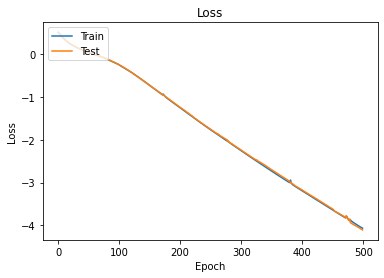

In [42]:
# Plot the learning curve (quantified by loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Evaluating the Model

### Prediction on the Test Set

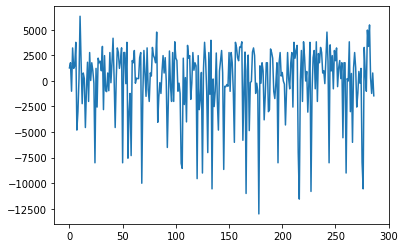

In [43]:
y_pred = CarPrice.predict(X_test)
# Remember that these are scaled numbers; you can inverse them back:
PredictedPrice = sc_y.inverse_transform(y_pred)
# The actual price:
ActualPrice = sc_y.inverse_transform(y_test)

# Let's call the differenc between Predicted and Actual price, Error:
Error = PredictedPrice - ActualPrice

import matplotlib.pyplot as plt

plt.plot(range(len(Error)), Error)

### Checking the Model Accuracy

In [44]:
AverageError = np.average(Error)
print('The avergae error is $', AverageError)

The avergae error is $ -32.399801965374564


In [45]:
PredictPrice = CarPrice.predict(sc_X.transform(np.array([[23.0, 46986, 1165.0, 90, 1, 2000.0, 3]])))
# Wait! You must Scale it back
PredictPrice = sc_y.inverse_transform(PredictPrice)
print('My friend your car is worth $', PredictPrice)

My friend your car is worth $ [[10937.136]]


In [46]:
# Change the Age of the car and see if the predicted price makes sense..
PredictPrice = CarPrice.predict(sc_X.transform(np.array([[3.0, 46986, 1165.0, 90, 1, 2000.0, 3]])))
# Wait! You must Scaled it back
PredictPrice = sc_y.inverse_transform(PredictPrice)
print('My friend your car is worth $', PredictPrice)

My friend your car is worth $ [[10937.136]]
